In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
train=ImageDataGenerator(rescale=1/255)
test=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train=train.flow_from_directory('/content/drive/My Drive/Colab Notebooks/plant leaf/train',
                                target_size=(200,200), 
                                batch_size=21, 
                                class_mode='categorical')

Found 4976 images belonging to 21 classes.


In [6]:
test=test.flow_from_directory('/content/drive/My Drive/Colab Notebooks/plant leaf/test', 
                                          target_size=(200,200),
                                          batch_size=21,
                                          class_mode='categorical')

Found 1102 images belonging to 21 classes.


In [7]:
validation=validation.flow_from_directory('/content/drive/My Drive/Colab Notebooks/plant leaf/validation', 
                                          target_size=(200,200),
                                          batch_size=21,
                                          class_mode='categorical')

Found 1742 images belonging to 21 classes.


In [8]:
train.class_indices

{'Corn_Cercospora_leaf_spot Gray_leaf_spot': 0,
 'Corn_Common_rust': 1,
 'Corn_Northern_Leaf_Blight': 2,
 'Corn_healthy': 3,
 'Pepper_bell_Bacterial_spot': 4,
 'Pepper_bell_healthy': 5,
 'Potato_Early_blight': 6,
 'Potato_Late_blight': 7,
 'Potato_healthy': 8,
 'Tomato_Bacterial_spot': 9,
 'Tomato_Early_blight': 10,
 'Tomato_Late_blight': 11,
 'Tomato_Leaf_Mold': 12,
 'Tomato_Septoria_leaf_spot': 13,
 'Tomato_Target_Spot': 14,
 'Tomato_YellowLeaf_Curl_Virus': 15,
 'Tomato_healthy': 16,
 'Tomato_mosaic_virus': 17,
 'bean_angular_leaf_spot': 18,
 'bean_healthy': 19,
 'bean_rust': 20}

In [9]:
classification=['Corn_Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_Common_rust',
 'Corn_Northern_Leaf_Blight',
 'Corn_healthy',
 'Pepper_bell_Bacterial_spot',
 'Pepper_bell_healthy',
 'Potato_Early_blight',
 'Potato_Late_blight',
 'Potato_healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Target_Spot',
 'Tomato_Tomato_YellowLeaf_Curl_Virus',
 'Tomato_Tomato_mosaic_virus',
 'Tomato_healthy',
 'bean_angular_leaf_spot',
 'bean_healthy',
 'bean_rust']

In [10]:
feature_extractor = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [11]:
feature_extractor_layer = hub.KerasLayer(feature_extractor, input_shape=(224,224,3))

In [12]:
feature_extractor_layer.trainable = False

In [13]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(21,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 21)                26901     
Total params: 2,284,885
Trainable params: 26,901
Non-trainable params: 2,257,984
_________________________________________________________________


In [14]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  metrics=['acc'])

In [15]:
history = model.fit(train, epochs=25, validation_data=validation)

Epoch 1/25
237/237 [==============================] - 2214s 9s/step - loss: 0.6961 - acc: 0.5802 - val_loss: 0.6897 - val_acc: 0.7365
Epoch 2/25
237/237 [==============================] - 25s 104ms/step - loss: 0.6860 - acc: 0.7964 - val_loss: 0.6870 - val_acc: 0.7732
Epoch 3/25
237/237 [==============================] - 24s 103ms/step - loss: 0.6837 - acc: 0.8449 - val_loss: 0.6844 - val_acc: 0.8341
Epoch 4/25
237/237 [==============================] - 24s 102ms/step - loss: 0.6820 - acc: 0.8774 - val_loss: 0.6836 - val_acc: 0.8479
Epoch 5/25
237/237 [==============================] - 24s 102ms/step - loss: 0.6813 - acc: 0.8925 - val_loss: 0.6836 - val_acc: 0.8404
Epoch 6/25
237/237 [==============================] - 24s 103ms/step - loss: 0.6805 - acc: 0.9078 - val_loss: 0.6829 - val_acc: 0.8611
Epoch 7/25
237/237 [==============================] - 24s 101ms/step - loss: 0.6801 - acc: 0.9136 - val_loss: 0.6826 - val_acc: 0.8622
Epoch 8/25
237/237 [==============================] - 24

In [16]:
result=model.evaluate(test)

53/53 [==============================] - 361s 7s/step - loss: 0.6798 - acc: 0.9038


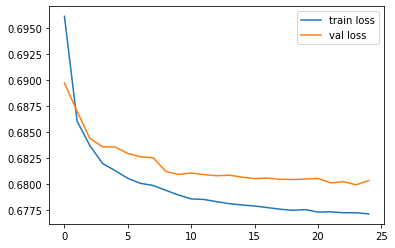

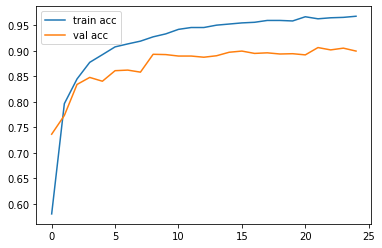

<Figure size 432x288 with 0 Axes>

In [17]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
from google.colab import files
uploaded=files.upload()

Saving b6843d4e-85a6-4e1f-97a9-e892720406fe___JR_B.Spot 8974.JPG to b6843d4e-85a6-4e1f-97a9-e892720406fe___JR_B.Spot 8974.JPG


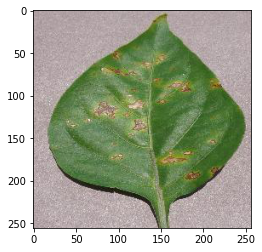

In [19]:
new_image=plt.imread('b6843d4e-85a6-4e1f-97a9-e892720406fe___JR_B.Spot 8974.JPG')
img=plt.imshow(new_image)

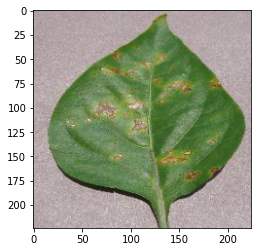

In [20]:
from skimage.transform import resize
resized_image=resize(new_image, (224,224))
img=plt.imshow(resized_image)

In [21]:
predictions=model.predict(np.array([resized_image]))
predictions

array([[5.51178270e-10, 2.58077895e-14, 5.31687019e-14, 1.76984959e-13,
        9.99997377e-01, 2.64729738e-06, 8.12855472e-09, 4.56678584e-11,
        2.70897129e-13, 8.58810939e-11, 8.40771952e-10, 3.97148948e-13,
        1.81276938e-11, 1.92213134e-10, 5.65281274e-13, 2.44687422e-14,
        1.16050851e-15, 6.64344112e-19, 1.23383435e-14, 1.80941925e-14,
        4.61698804e-11]], dtype=float32)

In [22]:
list_index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
x=predictions

for i in range(21):
  for j in range(21):
    if x[0][list_index[i]]>x[0][list_index[j]]:
      temp=list_index[i]
      list_index[i]=list_index[j]
      list_index[j]=temp

In [23]:
print(list_index)

[4, 5, 6, 10, 0, 13, 9, 20, 7, 12, 14, 11, 8, 3, 2, 1, 15, 19, 18, 16, 17, 21]


In [24]:
for i in range(21):
  print(classification[list_index[i]], ':' , predictions[0][list_index[i]] * 100 )

Pepper_bell_Bacterial_spot : 99.99973773956299
Pepper_bell_healthy : 0.0002647297378643998
Potato_Early_blight : 8.128554718211944e-07
Tomato_Early_blight : 8.407719520597823e-08
Corn_Cercospora_leaf_spot Gray_leaf_spot : 5.511782696920875e-08
Tomato_Septoria_leaf_spot : 1.9221313429795828e-08
Tomato_Bacterial_spot : 8.588109390306187e-09
bean_rust : 4.616988041883374e-09
Potato_Late_blight : 4.566785838377996e-09
Tomato_Leaf_Mold : 1.812769379050394e-09
Tomato_Target_Spot : 5.652812744803837e-11
Tomato_Late_blight : 3.971489478428458e-11
Potato_healthy : 2.708971285139694e-11
Corn_healthy : 1.769849593486264e-11
Corn_Northern_Leaf_Blight : 5.316870194441679e-12
Corn_Common_rust : 2.580778947209976e-12
Tomato_Tomato_YellowLeaf_Curl_Virus : 2.446874219083975e-12
bean_healthy : 1.809419245837017e-12
bean_angular_leaf_spot : 1.2338343542662392e-12
Tomato_Tomato_mosaic_virus : 1.1605085119674474e-13
Tomato_healthy : 6.643441119125232e-17
